In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rasterio as rst
from rasterio.mask import mask
import geopandas as gpd

from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

import warnings
warnings.filterwarnings("ignore")

In [2]:
dprvi_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/florestal_DpRVI_reindex.csv')
dprvi_s = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/savanica_DpRVI_reindex.csv')
dprvi_c = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/campestre_DpRVI_reindex.csv')

dop_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/florestal_DOP.csv')
dop_s = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/savanica_DOP.csv')
dop_c = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/campestre_DOP.csv')

beta_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/florestal_Beta.csv')
beta_s = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/savanica_Beta.csv')
beta_c = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/campestre_Beta.csv')

In [6]:
def month_season_detector(df):

    df['data'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    df['month'] = df['data'].dt.month

    df.loc[df['month']==1,'mes'] = 'Jan'
    df.loc[df['month']==2,'mes'] = 'Feb'
    df.loc[df['month']==3,'mes'] = 'Mar'
    df.loc[df['month']==4,'mes'] = 'Apr'
    df.loc[df['month']==5,'mes'] = 'May'
    df.loc[df['month']==6,'mes'] = 'Jun'
    df.loc[df['month']==7,'mes'] = 'Jul'
    df.loc[df['month']==8,'mes'] = 'Aug'
    df.loc[df['month']==9,'mes'] = 'Sep'
    df.loc[df['month']==10,'mes'] = 'Oct'
    df.loc[df['month']==11,'mes'] = 'Nov'
    df.loc[df['month']==12,'mes'] = 'Dec'

    df.loc[df['month']==1,'season'] = 'wet'
    df.loc[df['month']==2,'season'] = 'wet'
    df.loc[df['month']==3,'season'] = 'wet'
    df.loc[df['month']==4,'season'] = 'wet'
    df.loc[df['month']==5,'season'] = 'dry'
    df.loc[df['month']==6,'season'] = 'dry'
    df.loc[df['month']==7,'season'] = 'dry'
    df.loc[df['month']==8,'season'] = 'dry'
    df.loc[df['month']==9,'season'] = 'dry'
    df.loc[df['month']==10,'season'] = 'wet'
    df.loc[df['month']==11,'season'] = 'wet'
    df.loc[df['month']==12,'season'] = 'wet'

In [7]:
month_season_detector(dprvi_f)
month_season_detector(dprvi_s)
month_season_detector(dprvi_c)

In [8]:
red_circle = dict(markerfacecolor='red', marker='o', markersize=10, markeredgecolor='white')

pink_patch = dict(facecolor='pink', color='k')
blue_patch = dict(facecolor='lightblue', color='k')
green_patch = dict(facecolor='lightgreen', color='k')
orange_patch = dict(facecolor='orange', color='k')
yellow_patch = dict(facecolor='yellow', color='k')

median_patch = dict(color='red')

In [9]:
dprvi_f_dict = {'wet': dprvi_f.loc[dprvi_f['season']=='wet']['median'].values, 'dry': dprvi_f.loc[dprvi_f['season']=='dry']['median'].values}
dprvi_s_dict = {'wet': dprvi_s.loc[dprvi_s['season']=='wet']['median'].values, 'dry': dprvi_s.loc[dprvi_s['season']=='dry']['median'].values}
dprvi_c_dict = {'wet': dprvi_c.loc[dprvi_c['season']=='wet']['median'].values, 'dry': dprvi_c.loc[dprvi_c['season']=='dry']['median'].values}


In [10]:
rain = pd.read_csv('D:/thesis_data/pluviometric_data/pluviometric_data_PNB_paper_01.csv', sep=',')

In [11]:
month_season_detector(rain)

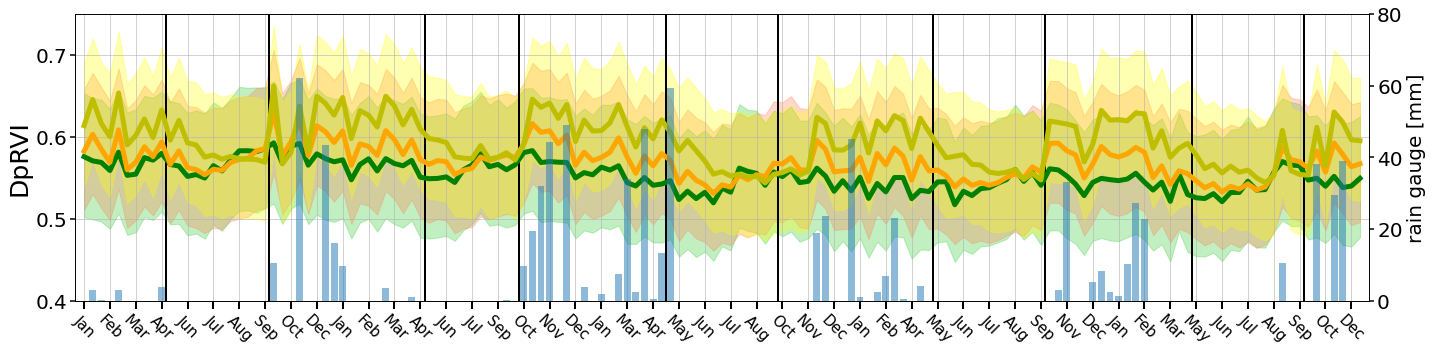

In [13]:
label_size = 20

x = dprvi_f.index

y_f = dprvi_f
y_s = dprvi_s
y_c = dprvi_c

fig, ax = plt.subplots(figsize=(20,5))

ax.vlines(x[9] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, y_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, y_f['percentile_25'], y_f['percentile_75'], alpha=0.3, color='limegreen')

ax.plot(x, y_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, y_s['percentile_25'], y_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, y_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, y_c['percentile_25'], y_c['percentile_75'], alpha=0.3, color='yellow')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=y_f['mes'], fontdict={'fontsize': 15, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0.40, 0.75])
ax.set_xlim([-1, 149])
ax.set_ylabel('DpRVI', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=6)
ax.grid(True, alpha=0.7)

sec_0 = ax.twinx()
sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.5)
sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_0.locator_params(axis='y', nbins=6)
sec_0.set_ylim([0, 80])
sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

#sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

# plt.savefig('C:/Users/jales/Desktop/dprvi_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
#     orientation='landscape', format='svg', transparent=False)

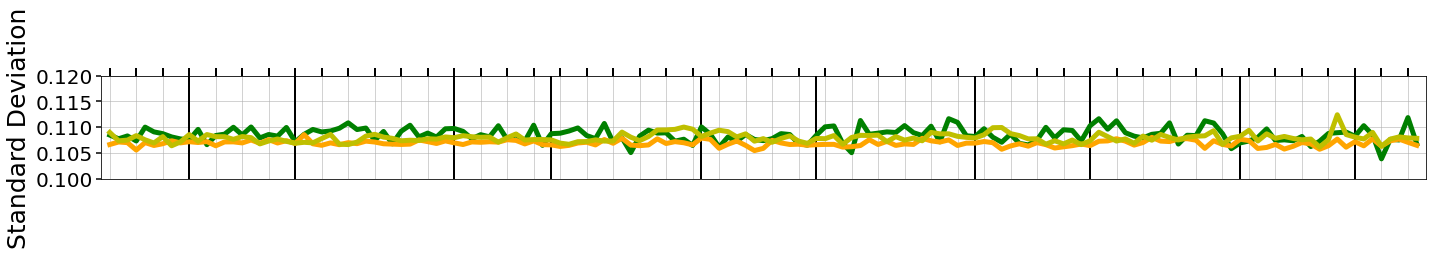

In [14]:
label_size = 20

x = dprvi_f.index

fig, ax = plt.subplots(figsize=(20,2))

ax.vlines(x[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, dprvi_f['std'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.plot(x, dprvi_s['std'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.plot(x, dprvi_c['std'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')

ax.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=dprvi_f['mes'], fontdict={'fontsize': 20, 'rotation': -60})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0.1, 0.12])
ax.set_xlim([-1, 149])
ax.set_ylabel('Standard Deviation', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=4)
ax.grid(True, alpha=0.7)

plt.tight_layout()

# plt.savefig('C:/Users/jales/Desktop/dprvi_std_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
#     orientation='landscape', format='svg', transparent=False)

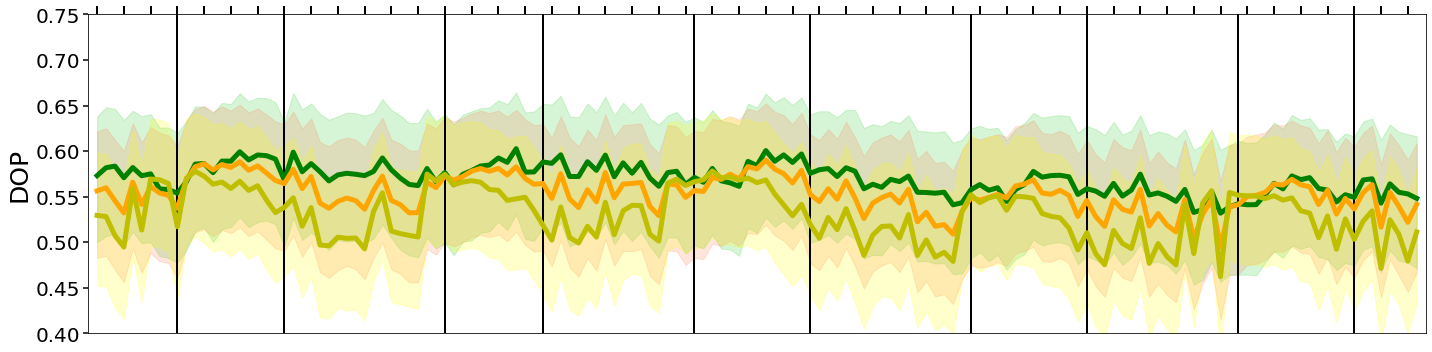

In [27]:
label_size = 20

fig, ax = plt.subplots(figsize=(20,5))

ax.vlines(dprvi_f.index[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(dprvi_f.index, dop_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(dop_f.index, dop_f['percentile_25'], dop_f['percentile_75'], alpha=0.2, color='limegreen')

ax.plot(dprvi_s.index, dop_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(dop_s.index, dop_s['percentile_25'], dop_s['percentile_75'], alpha=0.2, color='coral')

ax.plot(dop_c.index, dop_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(dop_c.index, dop_c['percentile_25'], dop_c['percentile_75'], alpha=0.2, color='yellow')
 
ax.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, length=8, width=2)
ax.set_xticks(ticks=dprvi_f.index)
ax.set_xticklabels(labels=dprvi_f['mes'], fontdict={'fontsize': 20, 'rotation': -60})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0.40, 0.75])
ax.set_xlim([-1, 149])
ax.set_ylabel('DOP', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/dprvi_dop_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

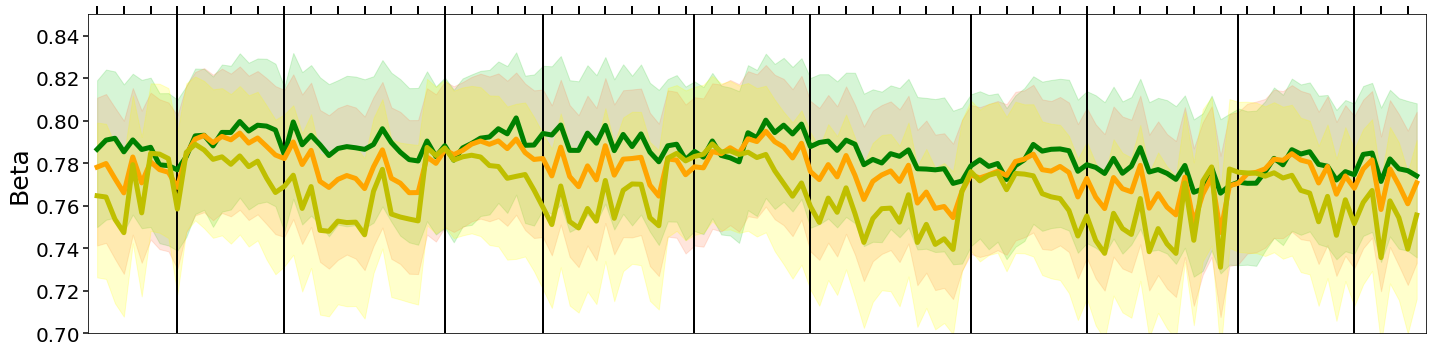

In [28]:
label_size = 20

fig, ax = plt.subplots(figsize=(20,5))

ax.vlines(dprvi_f.index[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(dprvi_f.index[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(beta_f.index, beta_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(beta_f.index, beta_f['percentile_25'], beta_f['percentile_75'], alpha=0.2, color='limegreen')

ax.plot(beta_s.index, beta_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(beta_s.index, beta_s['percentile_25'], beta_s['percentile_75'], alpha=0.2, color='coral')

ax.plot(beta_c.index, beta_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(beta_c.index, beta_c['percentile_25'], beta_c['percentile_75'], alpha=0.2, color='yellow')

ax.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, length=8, width=2)
ax.set_xticks(ticks=dprvi_f.index)
ax.set_xticklabels(labels=dprvi_f['mes'], fontdict={'fontsize': 20, 'rotation': -60})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0.70, 0.85])
ax.set_xlim([-1, 149])
ax.set_ylabel('Beta', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/dprvi_beta_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

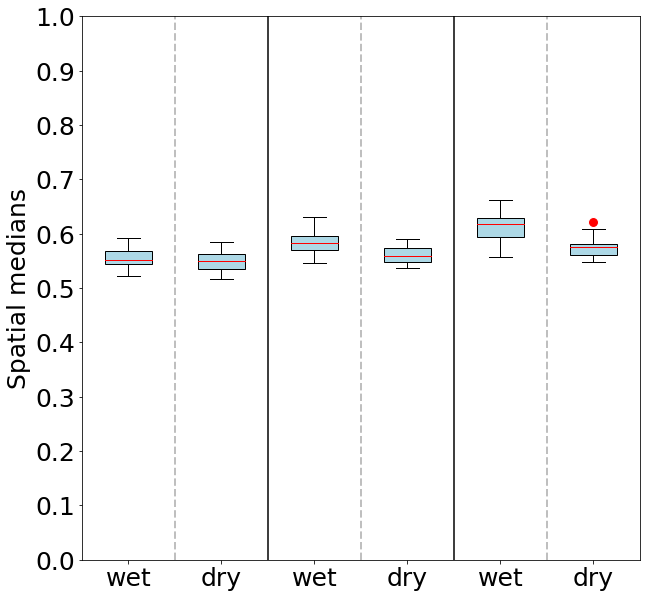

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.vlines(1.5, ymin=0, ymax=1.5, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(2.5, ymin=0, ymax=1.5, colors='k')
ax.vlines(3.5, ymin=0, ymax=1.5, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(4.5, ymin=0, ymax=1.5, colors='k')
ax.vlines(5.5, ymin=0, ymax=1.5, colors='grey', linewidth=2, linestyle='--', alpha=0.5)

ax.boxplot([dprvi_f_dict['wet'], dprvi_f_dict['dry'], dprvi_s_dict['wet'], dprvi_s_dict['dry'], dprvi_c_dict['wet'], dprvi_c_dict['dry']], patch_artist=True, flierprops=red_circle, boxprops=blue_patch, medianprops=median_patch)
ax.set_ylim([0, 1])
ax.set_xticklabels(labels=['wet', 'dry', 'wet', 'dry', 'wet', 'dry'], fontdict={'fontsize': 25})
ax.locator_params(axis='y', nbins=12)
ax.set_ylabel('Spatial medians', fontsize=25)
ax.tick_params(axis='y', labelsize=25)

plt.savefig('C:/Users/jales/Desktop/dprvi_boxplots_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [36]:
water = gpd.read_file('D:/thesis_data/ROI/classes/agua_10m_32723.geojson')
water = [geom for geom in water.geometry]

with rst.open('D:/thesis_data/VEG_INDICES/dprvi_parameters/dprvi_parameters_20201222T084516.tif') as raster:
    image, _ = mask(raster, water, invert=True, nodata=np.nan)

    dprvi = image[0]

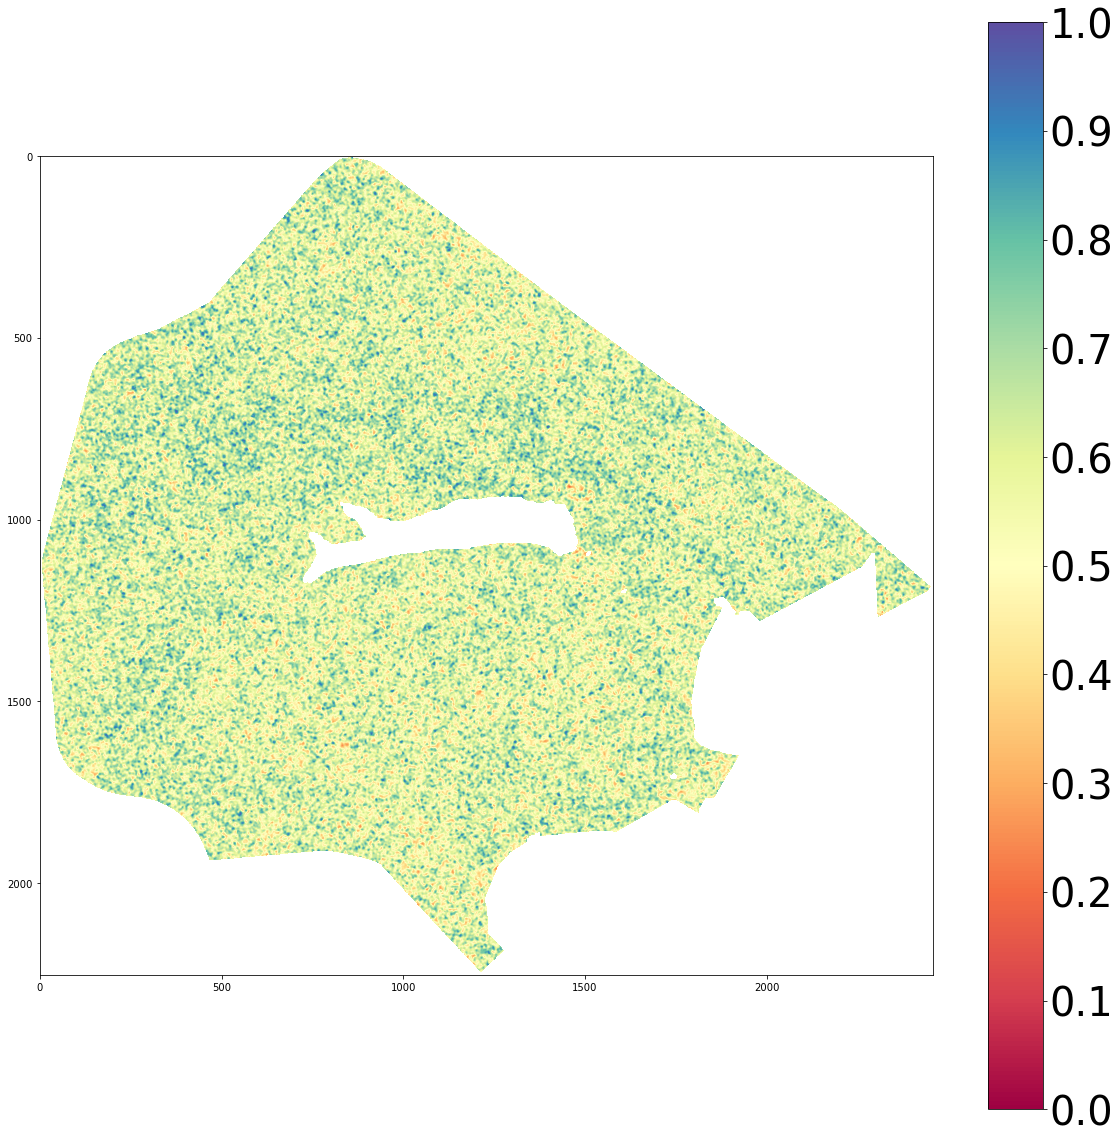

In [39]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.imshow(dprvi, cmap='Spectral', vmin=0, vmax=1)

norm = Normalize(vmin = np.min(0), vmax = np.max(1))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap='Spectral'), ax=ax, location='right')
cbar.ax.tick_params(labelsize=40)
cbar.ax.locator_params(axis='y', nbins=10)

plt.savefig('C:/Users/jales/Desktop/dprvi_wet.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [19]:
import matplotlib.pyplot as plt
import rioxarray as rxr 
from shapely.geometry import mapping
import geopandas as gpd

In [21]:
# Open vector layer
florestal_path = 'D:/thesis_data/ROI/classes/form_florestal_30m_32723_buffer.geojson'
savanica_path = 'D:/thesis_data/ROI/classes/form_savanica_30m_32723_buffer.geojson'
campestre_path = 'D:/thesis_data/ROI/classes/form_campestre_30m_32723_buffer.geojson'


In [22]:
# Clip raster para cada classe vectorial de interesse
crop_savanica = gpd.read_file(savanica_path)
crop_campestre = gpd.read_file(campestre_path)
crop_florestal = gpd.read_file(florestal_path)

In [41]:
raster = rxr.open_rasterio('D:/thesis_data/VEG_INDICES/raster/20201222T084517.tif', masked=True)
dprvi = raster.sel(band=1) # Seleção da banda

In [42]:
florestal_dpsvim = dprvi.rio.clip(crop_florestal.geometry.apply(mapping))
savanica_dpsvim = dprvi.rio.clip(crop_savanica.geometry.apply(mapping))
campestre_dpsvim = dprvi.rio.clip(crop_campestre.geometry.apply(mapping))

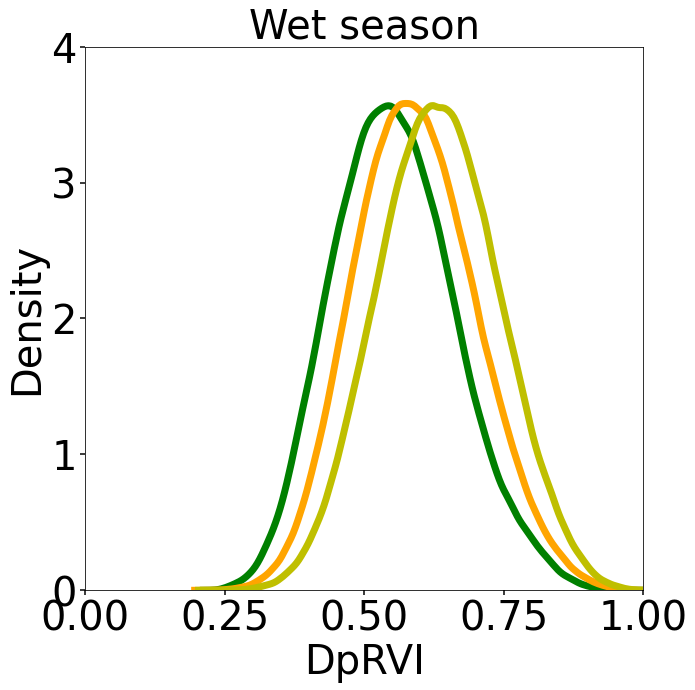

In [43]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

bins=1500

sns.distplot(florestal_dpsvim, bins=bins, hist=False, color='green', kde_kws={'linewidth': 7}, label='Forest')
sns.distplot(savanica_dpsvim, bins=bins, hist=False, color='orange', kde_kws={'linewidth': 7}, label='Savanna')
sns.distplot(campestre_dpsvim, bins=bins, hist=False, color='y', kde_kws={'linewidth': 7}, label='Grassland')

ax.set_title('Wet season', fontdict={'fontsize':40})
ax.set_ylabel('Density', fontsize=40)
ax.set_xlim([0, 1])
ax.set_ylim([0, 4])
ax.set_xlabel('DpRVI', fontsize=40)
ax.tick_params(axis='y', length=5, width=1.5, labelsize=40)
ax.tick_params(axis='x', length=5, width=1.5, labelsize=40)

#fig.legend(fontsize=25, loc='upper right')

plt.savefig('C:/Users/jales/Desktop/dprvi_dists_wet.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)